<a href="https://colab.research.google.com/github/amita-kapoor/COVID-2020/blob/master/Prediction_Covid_19_WorldWide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid 19 cases World Wide Analysis 
Data Source: https://github.com/CSSEGISandData/COVID-19

In [1]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 13.0MB/s 
     |████████████████████████████████| 14.7MB 310kB/s 


In [0]:
from datetime import timedelta, date, datetime
#import datetime as dt
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline


# Read data 
Data source: [CSSEGISandData](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data)

In [0]:
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2020, 1, 22)
end_dt = date(2020, 4, 16)
dates = []
for dt in daterange(start_dt, end_dt):
    dates.append(dt.strftime("%m-%d-%Y"))


In [4]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
df1 = pd.read_csv(url+dates[0]+'.csv')
for dt in tqdm(dates):
  #print(dt)
  df2 = pd.read_csv(url+dt+'.csv')
  if datetime.strptime(dt,"%m-%d-%Y")  > datetime.strptime("03-21-2020", "%m-%d-%Y"): 
    print(dt)
    df2.rename(columns={'Province_State': 'Province/State', 'Country_Region':'Country/Region','Last_Update': 'Last Update'}, inplace = True)
    df2.drop(['FIPS'], axis=1, inplace=True)
    df2.drop(['Admin2'], axis=1, inplace=True)
    df2.drop(['Active'], axis=1, inplace=True)
    df2.drop(['Combined_Key'], axis=1, inplace=True)
  df1 = pd.merge(df1, df2, how='outer' )

 72%|███████▏  | 62/86 [00:05<00:02,  9.15it/s]

03-22-2020
03-23-2020


 73%|███████▎  | 63/86 [00:05<00:03,  7.64it/s]

03-24-2020
03-25-2020


 76%|███████▌  | 65/86 [00:06<00:03,  6.46it/s]

03-26-2020
03-27-2020


 78%|███████▊  | 67/86 [00:06<00:03,  5.76it/s]

03-28-2020
03-29-2020


 80%|████████  | 69/86 [00:06<00:03,  5.51it/s]

03-30-2020


 81%|████████▏ | 70/86 [00:07<00:02,  5.35it/s]

03-31-2020
04-01-2020


 84%|████████▎ | 72/86 [00:07<00:02,  5.30it/s]

04-02-2020
04-03-2020


 86%|████████▌ | 74/86 [00:07<00:02,  5.16it/s]

04-04-2020
04-05-2020


 88%|████████▊ | 76/86 [00:08<00:01,  5.05it/s]

04-06-2020


 90%|████████▉ | 77/86 [00:08<00:01,  4.93it/s]

04-07-2020


 91%|█████████ | 78/86 [00:08<00:01,  4.48it/s]

04-08-2020


 92%|█████████▏| 79/86 [00:09<00:01,  4.32it/s]

04-09-2020


 93%|█████████▎| 80/86 [00:09<00:01,  4.37it/s]

04-10-2020


 94%|█████████▍| 81/86 [00:09<00:01,  4.26it/s]

04-11-2020


 95%|█████████▌| 82/86 [00:09<00:00,  4.29it/s]

04-12-2020


 97%|█████████▋| 83/86 [00:09<00:00,  4.26it/s]

04-13-2020


 98%|█████████▊| 84/86 [00:10<00:00,  4.19it/s]

04-14-2020


 99%|█████████▉| 85/86 [00:10<00:00,  4.21it/s]

04-15-2020


100%|██████████| 86/86 [00:10<00:00,  8.03it/s]

04-16-2020


In [0]:
df1.drop(['Province/State'], axis=1, inplace=True)
df1['Last Update']= pd.to_datetime(df1['Last Update']) 
df1['Last Update'] = df1['Last Update'].dt.date
df1.fillna(0, inplace = True)

In [0]:
dict_country = {'Cote d\'Ivoire': 'Côte d\'Ivoire', 'Martinique':'France', 'Hong Kong':'China',
                'North Korea':'Korea, Democratic People\'s Republic of','Republic of Korea':'South Korea',
                'Korea, South': 'South Korea','US':'United States of America','UK':'United Kingdom',
                'Mainland China':'China','Iran (Islamic Republic of)':'Iran', 'Czech Republic': 'Czechia',
                'Hong Kong SAR': 'Hong Kong','Bosnia and Herzegovina': 'Bosnia and Herz.','Republic of Ireland':'Ireland',
                ' Azerbaijan':'Azerbaijan', 'Andorra':'Italy','Aruba':'Netherlands','Cayman Islands':'United Kingdom',
                'Central African Republic':'Central African Rep.','Channel Islands':'United Kingdom',
                'Congo (Brazzaville)':'Congo','Congo (Kinshasa)':'Congo','Viet Nam':'Vietnam',
                'Equatorial Guinea': 'Eq. Guinea', 'Eswatini':'eSwatini' ,'occupied Palestinian territory':'Palestine',
                'Vatican City':'Italy','The Bahamas':'Bahamas','Taiwan*':'Taiwan','Taipei and environs':'Taiwan','Holy See':'Italy',
                'Saint Martin':'St. Martin','Singapore':'China','Russian Federation':'Russia',
                'Republic of the Congo':'Congo','Republic of Moldova':'Moldova','North Macedonia':'Macedonia',
                'North Ireland':'United Kingdom','Monaco':'Others','Seychelles':'Others','Saint Vincent and the Grenadines':'Others',
                'Antigua and Barbuda':'Others','Bahrain':'Others','Cruise Ship':'Others', 'Curacao':'Others','Dominican Republic':'Dominican Rep.',
                'Faroe Islands': 'Others', 'French Guiana':'Others','Gibraltar':'Others','Guadeloupe':'Others','Guam':'Others','Ivory Coast':'Côte d\'Ivoire'}
for key, value in dict_country.items():
  df1['Country/Region'].replace([key], value,inplace=True)

In [7]:
df1.head()

,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Lat,Long_
0,China,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,China,2020-01-22,14.0,0.0,0.0,0.0,0.0,0.0,0.0
2,China,2020-01-22,6.0,0.0,0.0,0.0,0.0,0.0,0.0
3,China,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,China,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83502 entries, 0 to 83501
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  83502 non-null  object 
 1   Last Update     83502 non-null  object 
 2   Confirmed       83502 non-null  float64
 3   Deaths          83502 non-null  float64
 4   Recovered       83502 non-null  float64
 5   Latitude        83502 non-null  float64
 6   Longitude       83502 non-null  float64
 7   Lat             83502 non-null  float64
 8   Long_           83502 non-null  float64
dtypes: float64(7), object(2)
memory usage: 6.4+ MB


In [9]:
df1.head()

,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Lat,Long_
0,China,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,China,2020-01-22,14.0,0.0,0.0,0.0,0.0,0.0,0.0
2,China,2020-01-22,6.0,0.0,0.0,0.0,0.0,0.0,0.0
3,China,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,China,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df1 = pd.pivot_table(df1, index=['Country/Region','Last Update'], aggfunc={'Confirmed':np.sum, 'Deaths':np.sum,\
                                                                           'Recovered':np.sum,'Latitude':np.max,\
                                                                           'Longitude':np.max})

In [11]:
df1.head(10)


Confirmed  Deaths  Latitude  Longitude  Recovered
Country/Region Last Update                                                   
Afghanistan    2020-02-24         1.0     0.0   33.0000      65.00        0.0
               2020-03-08         4.0     0.0   33.0000      65.00        0.0
               2020-03-10         5.0     0.0   33.0000      65.00        0.0
               2020-03-11        14.0     0.0   33.0000      65.00        0.0
               2020-03-14        11.0     0.0   33.9391      67.71        0.0
               2020-03-15        16.0     0.0   33.9391      67.71        0.0
               2020-03-16        21.0     0.0   33.9391      67.71        1.0
               2020-03-17        22.0     0.0   33.9391      67.71        1.0
               2020-03-20        24.0     0.0   33.9391      67.71        1.0
               2020-03-22        40.0     1.0    0.0000       0.00        1.0

In [0]:
def plot_percent(df_country, Country):
  ## Plotting the percentage
  plt.rcParams.update({'font.size': 22})
  plt.rcParams["figure.figsize"] = [16,10]
  plt.rc('xtick',labelsize=14, )
  plt.rc('ytick',labelsize=14)
  ax = df_country.plot('Last Update', ['deceased_percent', 'recovered_percent'])
  #ax = df_country.plot('Last Update', 'deceased_percent')
  ax.set_ylabel("Percentage", fontname="Arial", fontsize=18)
  ax.set_xlabel("Date", fontname="Arial", fontsize=18)
  ax.legend(loc=0, prop={'size': 20})
  ax.set_title("Percentage deceased, recovered and severe in "+ Country, fontsize=20)
  plt.xticks(rotation=45)

In [0]:
def plot_total(df1, Country, graph='Active_recovered', bar=False):
  df_country = df1.loc[Country]
  df_country.reset_index(inplace=True)
  #df_country.drop(df_country.tail(1).index,inplace=True)
  
  ## Plotting the percentage
  plt.rcParams.update({'font.size': 22})
  plt.rcParams["figure.figsize"] = [16,10]
  plt.rc('xtick',labelsize=14, )
  plt.rc('ytick',labelsize=14)
  
  if graph == 'Active_recovered':
    df_country['Active'] = (df_country['Confirmed']- df_country['Deaths']-df_country['Recovered'])
    if bar:
      ax = df_country.plot.bar(x='Last Update', y=['Active', 'Recovered', 'Deaths'],stacked=True)
    else:
      ax = df_country.plot('Last Update', ['Active', 'Recovered', 'Deaths'])
    ax.set_ylabel("Number", fontname="Arial", fontsize=18)
    ax.set_xlabel("Date", fontname="Arial", fontsize=18)
    ax.legend(loc=0, prop={'size': 20})
    ax.set_title("Active, Recovered and Deaths in  "+ Country, fontsize=20)
    
  
  if graph == 'daily_increase':
    df_country['daily_increase'] = df_country['Confirmed'] - df_country['Confirmed'].shift(1)
    ax = df_country.plot.bar(x='Last Update', y=['daily_increase'])
    ax.set_ylabel("Daily increase", fontname="Arial", fontsize=18)
    ax.set_xlabel("Date", fontname="Arial", fontsize=18)
    ax.legend(loc=0, prop={'size': 20})
    ax.set_title("Daily Increase in "+ Country, fontsize=20)
    

  if graph == 'percent':
    df_country['deceased_percent'] = (df_country['Deaths']/ df_country['Confirmed'])*100
    df_country['recovered_percent'] = (df_country['Recovered']/ df_country['Confirmed'])*100
    ax = df_country.plot('Last Update', ['deceased_percent', 'recovered_percent'])
     #ax = df_country.plot('Last Update', 'deceased_percent')
    ax.set_ylabel("Percentage", fontname="Arial", fontsize=18)
    ax.set_xlabel("Date", fontname="Arial", fontsize=18)
    ax.legend(loc=0, prop={'size': 20})
    ax.set_title("Percentage deceased, recovered and severe in "+ Country, fontsize=20)
  
  plt.xticks(rotation=45)


## Summarizing data from all countries.


In [0]:
from scipy.optimize import curve_fit
def prediction_country_summary(Country, df1, plot= False):
  """
  function summarizes data for each country 
  """
  df_final = df1.copy()
  df_country = df_final.loc[Country]
  df_country.reset_index(inplace=True)
    
  # Adding percentage of Deceased and ICU 

  df_country['deceased_percent'] = (df_country['Deaths']/ df_country['Confirmed'])*100
  df_country['recovered_percent'] = (df_country['Recovered']/ df_country['Confirmed'])*100
  df_country['active'] = (df_country['Confirmed']- df_country['Deaths']-df_country['Recovered'])
  
  
  xdata=np.array(range(df_country.shape[0]))
  ydata=df_country['Confirmed'].values

  def func(x,a,b):
    return a*2**(x/b)
    
  try:
    popt, pcov = curve_fit(func,xdata=xdata,ydata=ydata)
    perr = np.sqrt(np.diag(pcov))
    resid = np.linalg.norm(ydata-func(xdata, *popt))
  except:
    popt = np.array([0,0])
  #print("For {} the coefficients of function is \n {} * 2 ** (t/{}) \n The covariance is:\n {} \n and the error is {}".format(Country,popt[0], popt[1], pcov, resid))

  if plot:
    fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
    perc = np.diff(ydata) / ydata[:-1]
    yfit = popt[0]*2**(xdata/popt[1])
    perc_fit = np.diff(yfit) / yfit[:-1]
    ax1.set_ylabel('Total infected in '+ Country,fontsize=20)
    #ax1.set_yscale('log')
    ax1.plot(df_country['Confirmed'],'--o',ms=10,label='Real Data')
    ax1.plot(xdata,yfit,'-',label=f'Exponential fit {round(popt[0],1)}*2^(t/{round(popt[1],1)}), \n doubling time = {round(popt[1],1)} days')
    ax1.legend(fontsize=15)
    plt.show()
  return [Country, df_country['Last Update'][0],df_country['Confirmed'].iloc[-1], df_country['active'].iloc[-1],\
          df_country['deceased_percent'].iloc[-1], df_country['recovered_percent'].iloc[-1],popt[0],popt[1], \
          df_country['Latitude'].iloc[-1],df_country['Longitude'].iloc[-1]] 



In [0]:
#Countries = set(df1.reset_index()['Country/Region'].tolist())  # to be used if you want to do it for all countries
Countries = ["China", "Iran", "South Korea", "Germany", "India", "Spain", "Italy", "United States of America", "United Kingdom"]

In [16]:
List = []
for Country in tqdm(Countries):
  List.append(prediction_country_summary(Country, df1))

100%|██████████| 9/9 [00:00<00:00, 70.56it/s]


In [17]:
df_summary = pd.DataFrame(List, columns = ["Country", "First_Case", "Total_Confirmed_Today", "Active","Deceased_Percent",\
                                          "Recovered_Percent","First_Coeff", "Doubling_time_in_days","Latitude", "Longitude"])
df_summary.head()

,Country,First_Case,Total_Confirmed_Today,Active,Deceased_Percent,Recovered_Percent,First_Coeff,Doubling_time_in_days,Latitude,Longitude
0,China,2020-01-22,78998.0,5293.0,4.164662,89.135168,4.022809e-19,1.000000,0.0,0.0
1,Iran,2020-02-19,77995.0,20897.0,6.242708,66.964549,4.223989e+03,12.633895,0.0,0.0
2,South Korea,2020-01-22,10613.0,2627.0,2.157731,73.089607,1.504102e+03,24.726179,0.0,0.0
3,Germany,2020-01-28,137698.0,56646.0,2.942672,55.919476,2.683365e+03,10.573943,0.0,0.0
4,India,2020-01-30,13430.0,11214.0,3.335815,13.164557,3.502908e+01,5.638825,0.0,0.0


In [0]:
#df_summary
#Uncomment this if you want to see all the countries.

Let us see how different countries are fairing in terms of increase in infected.

China 4.0228089987902634e-19 0.9999999968668725
Iran 4223.989244998574 12.633895493745046
South Korea 1504.101514629312 24.72617850820722
Germany 2683.364989182252 10.573942902501694
India 35.02907719131018 5.638824786572373
Spain 6625.127054871717 10.49565161812856
Italy 10056.218939091119 12.95641320129903
United States of America 1427.703545855192 7.729002985594295
United Kingdom 674.79322363237 7.394331826134674


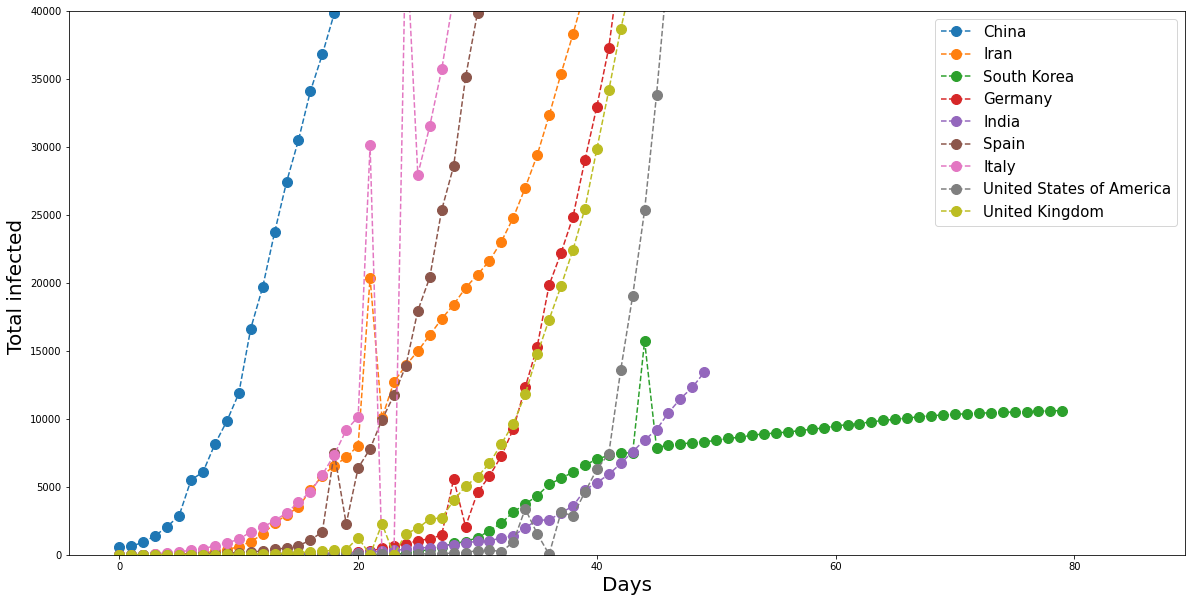

In [19]:
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(20,10))
ax1.set_ylabel('Total infected ',fontsize=20)
ax1.set_xlabel('Days',fontsize=20)
ax1.set_ylim(0,40000)
for loc in range(len(Countries)):
  Country = df_summary.loc[loc].Country
  df_country = df1.loc[Country]
  df_country.reset_index(inplace=True)
  orig = df_country['Confirmed'].tolist()
  coeff1, coeff2 = df_summary.loc[loc].First_Coeff, df_summary.loc[loc].Doubling_time_in_days
  print(Country, coeff1, coeff2)
  predictions = []
  for i in range(48):
    yfit = coeff1*2**(i/coeff2)
    predictions.append(yfit)
  ax1.plot(orig,'--o',ms=10,label=Country)
  #ax1.plot(yfit,'--',label=f'Exponential fit')
  #plt.plot(predictions, label='predictions')
  ax1.legend(fontsize=15)

And now the bad but necessary task of prediction--change `loc` to see a different country. 

India 35.02907719131018 5.638824786572373


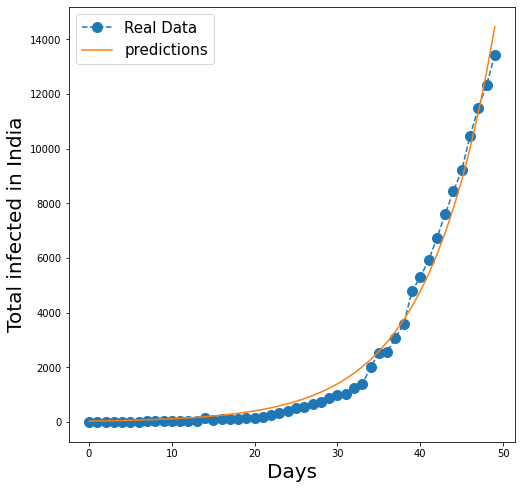

In [20]:
loc = 4
Country = df_summary.loc[loc].Country
df_country = df1.loc[Country]
df_country.reset_index(inplace=True)
orig = df_country['Confirmed'].tolist()
coeff1, coeff2 = df_summary.loc[loc].First_Coeff, df_summary.loc[loc].Doubling_time_in_days
print(Country, coeff1, coeff2)
predictions = []
for i in range(50):
  yfit = coeff1*2**(i/coeff2)
  predictions.append(yfit)

fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
ax1.set_ylabel('Total infected in '+Country,fontsize=20)
ax1.set_xlabel('Days',fontsize=20)
ax1.plot(orig,'--o',ms=10,label='Real Data')
#ax1.plot(yfit,'-',label=f'Exponential fit')
plt.plot(predictions, label='predictions')
ax1.legend(fontsize=15)

### Compare doubling time

Investigating how the doubling time is changing gives an idea how good or bad a country is doing in controlling the virus spread--
* A large doubling time is good.
* A constant doubling time - means the measures being taken are effective in controlling the spread
* An increasing doubling time means - the battle is on winning side
* A decreasing doubling time-- well danger zone ahead.  Do something fast

In [0]:
from scipy.optimize import curve_fit
def prediction_country2(Country, df1, plot=True,predict=False):
  df_final = df1.copy()
  df_country = df_final.loc[Country]
  df_country.reset_index(inplace=True)
    
  x=np.array(range(df_country.shape[0]))
  y=df_country['Confirmed'].values
  #print(len(x))

 
  def func(x,a,b):
    return a*2**(x/b)
  
  list_coeff = [Country]  
  for i in range(10, len(x), 1):
    xdata = x[:i]
    ydata = y[:i]

    try:
      popt, pcov = curve_fit(func,xdata=xdata,ydata=ydata)
    except:
      popt = np.array([0,0])
    list_coeff.append(popt[1])
  if plot:
    fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
    perc = np.diff(ydata) / ydata[:-1]
    yfit = popt[0]*2**(xdata/popt[1])
    perc_fit = np.diff(yfit) / yfit[:-1]
    ax1.set_ylabel('Total infected in '+ Country,fontsize=20)
    #ax1.set_yscale('log')
    ax1.plot(df_country['Confirmed'],'--o',ms=10,label='Real Data')
    ax1.plot(xdata,yfit,'-',label=f'Exponential fit {round(popt[0],1)}*2^(t/{round(popt[1],1)}), \n doubling time = {round(popt[1],1)} days')
    ax1.legend(fontsize=15)
    plt.show()
  if predict:
    x_new = [range(60)]
    predict_result = np.asarray([func(i, popt[0],popt[1]) for i in x_new])
    fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
    perc = np.diff(ydata) / ydata[:-1]
    yfit = predict_result
    #perc_fit = np.diff(yfit) / yfit[:-1]
    ax1.set_ylabel('Total infected in '+ Country,fontsize=20)
    #ax1.set_yscale('log')
    ax1.plot(df_country['Confirmed'],'--o',ms=10,label='Real Data')
    ax1.plot(yfit,'-',label=f'Exponential fit')
    ax1.legend(fontsize=15)
    plt.show()

  return list_coeff


In [22]:
Countries = ["China", "Iran", "South Korea", "Germany", "India", "Spain", "Italy", "United States of America", "United Kingdom"]
List = []
for Country in tqdm(Countries):
  coeff = prediction_country2(Country, df1,plot=False)
  List.append(coeff)

100%|██████████| 9/9 [00:00<00:00,  9.73it/s]


In [0]:
df_combines = pd.DataFrame(List).T

In [0]:
df_combines.columns = df_combines.iloc[0]
df_combines.drop(df_combines.index[0], inplace=True)

In [25]:
df_combines
#Uncomment it if you like me want to see numbers.

,China,Iran,South Korea,Germany,India,Spain,Italy,United States of America,United Kingdom
1,2.37534,1.46859,2.55368,4.24843,1.85762,1.48148,1.87864,4.96757,3.10638
2,2.62386,1.52231,2.49846,4.86703,2.36829,1.67929,2.08684,2.58907,2.74167
3,2.59604,1.47737,2.58495,5.62366,2.78295,1.86263,2.04362,4.94625,2.90559
4,2.74836,1.51846,2.96266,6.47299,3.19242,2.18377,2.24987,8.94521,2.9572
5,2.91505,1.54193,3.22009,7.1941,3.32391,2.12714,2.4616,12.8004,2.44257
6,3.13633,1.81276,3.37612,6.31375,1.84979,2.25684,2.64228,23.3029,2.26426
7,3.42334,2.12189,3.73351,4.38156,3.12145,2.31254,2.77371,33.1132,2.14719
8,3.71474,2.25482,4.1678,3.99031,3.52501,2.06932,2.9302,0.351909,2.25832
9,4.05222,2.44243,4.5711,2.94634,3.88353,1.81643,2.99397,4.59031,2.32871
10,4.39756,2.73979,5.01976,2.03401,4.28641,0.556929,3.03018,1.78977,2.55562


In [26]:
df_combines["India"].rolling(10).mean()

1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10    3.019138
11    3.283452
12    3.520073
13    3.715920
14    3.854318
15    3.937122
16    4.142613
17    4.197485
18    4.226074
19    4.221010
20    4.192073
21    4.145037
22    4.088746
23    4.062587
24    4.062065
25    4.116943
26    4.160577
27    4.190057
28    4.222342
29    4.257820
30    4.282333
31    4.280693
32    4.267631
33    4.237581
34    4.212747
35    4.189900
36    4.220500
37    4.310320
38    4.398938
39    4.499762
40    4.617591
41         NaN
42         NaN
43         NaN
44         NaN
45         NaN
46         NaN
47         NaN
48         NaN
49         NaN
50         NaN
51         NaN
52         NaN
53         NaN
54         NaN
55         NaN
56         NaN
57         NaN
58         NaN
59         NaN
60         NaN
61         NaN
62         NaN
63         NaN
64         NaN
65         NaN
66         NaN
67        

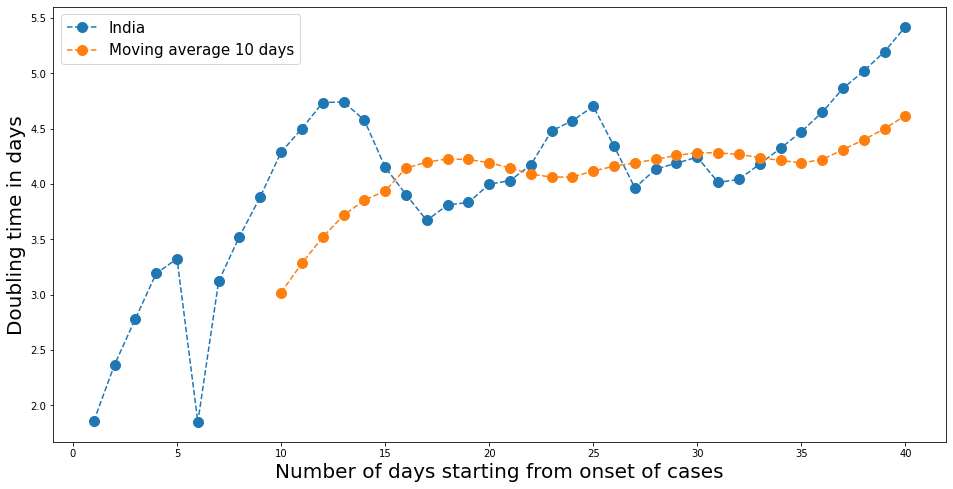

In [27]:
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
ax1.set_ylabel('Doubling time in days',fontsize=20)
ax1.set_xlabel('Number of days starting from onset of cases',fontsize=20)
ax1.plot(df_combines['India'],'--o',ms=10,label='India')
ax1.plot(df_combines["India"].rolling(10).mean(),'--o',ms=10,label='Moving average 10 days' )
ax1.legend(fontsize=15)
#plt.show()

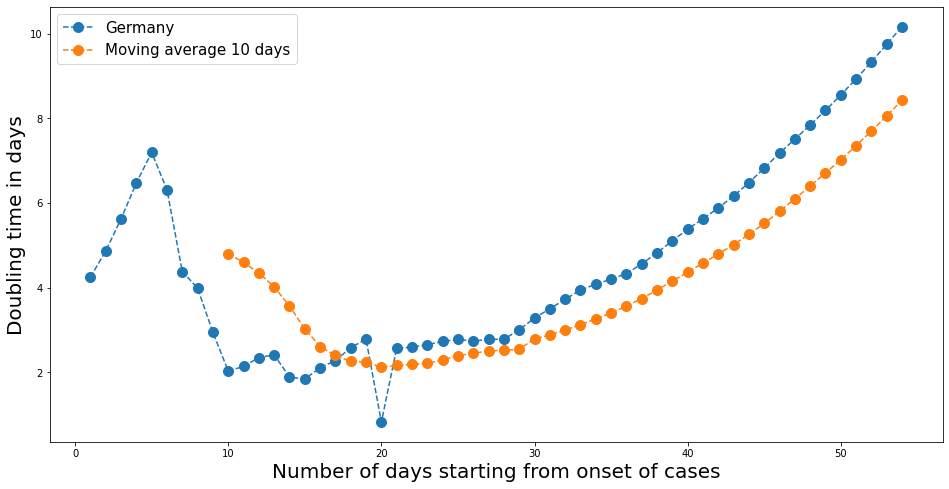

In [28]:
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
ax1.set_ylabel('Doubling time in days',fontsize=20)
ax1.set_xlabel('Number of days starting from onset of cases',fontsize=20)
ax1.plot(df_combines['Germany'],'--o',ms=10,label='Germany')
ax1.plot(df_combines["Germany"].rolling(10).mean(),'--o',ms=10,label='Moving average 10 days' )
ax1.legend(fontsize=15)

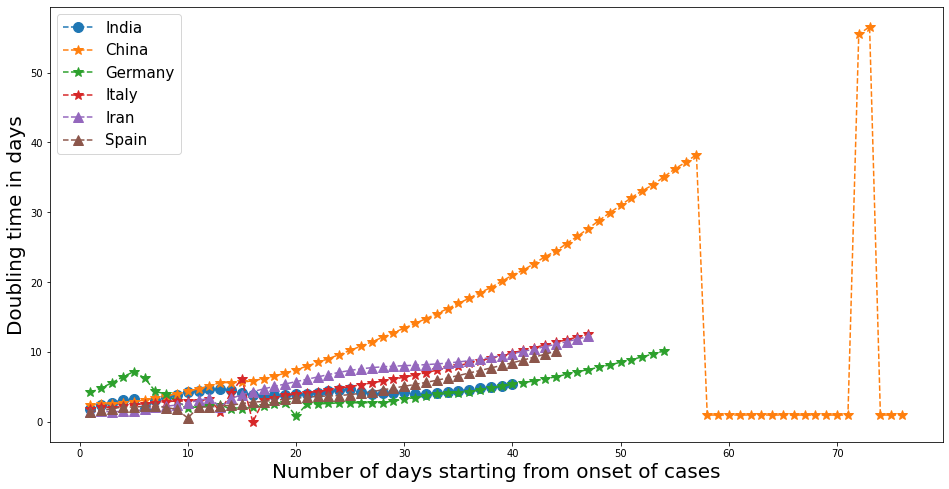

In [29]:
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
ax1.set_ylabel('Doubling time in days',fontsize=20)
ax1.set_xlabel('Number of days starting from onset of cases',fontsize=20)
ax1.plot(df_combines['India'],'--o',ms=10,label='India')
ax1.plot(df_combines['China'],'--*',ms=10,label='China')
ax1.plot(df_combines['Germany'],'--*',ms=10,label='Germany')
ax1.plot(df_combines['Italy'],'--*',ms=10,label='Italy')
ax1.plot(df_combines['Iran'],'--^',ms=10,label='Iran')
ax1.plot(df_combines['Spain'],'--^',ms=10,label='Spain')
ax1.legend(fontsize=15)
#plt.show()

Let us zoom the graph a little

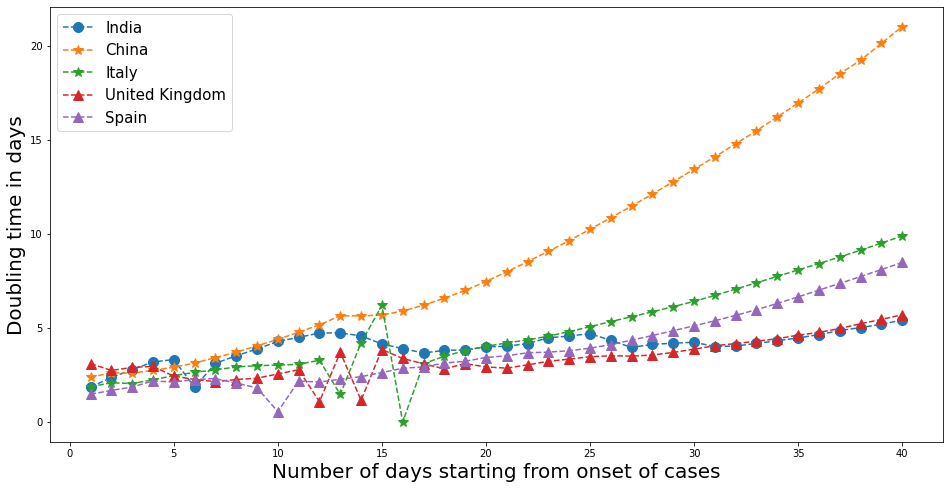

In [30]:
num = 40
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
ax1.set_ylabel('Doubling time in days',fontsize=20)
ax1.set_xlabel('Number of days starting from onset of cases',fontsize=20)
ax1.plot(df_combines['India'],'--o',ms=10,label='India')
ax1.plot(df_combines['China'].iloc[:num],'--*',ms=10,label='China')
#ax1.plot(df_combines['Germany'].iloc[:num],'--*',ms=10,label='Germany')
ax1.plot(df_combines['Italy'].iloc[:num],'--*',ms=10,label='Italy')
#ax1.plot(df_combines['Iran'].iloc[:num],'--^',ms=10,label='Iran')
ax1.plot(df_combines['United Kingdom'].iloc[:num],'--^',ms=10,label='United Kingdom')
ax1.plot(df_combines['Spain'].iloc[:num],'--^',ms=10,label='Spain')
#ax1.plot(df_combines['United States of America'].iloc[:num],'--^',ms=10,label='United States of America')
ax1.legend(fontsize=15)
#plt.show()

### What next? Are we moving in the right direction?

And now finally inspired from the [video](https://www.youtube.com/watch?v=54XLXg4fYsc&feature=youtu.be&fbclid=IwAR3H_-ZPnN6oClslsCP8_QykkTfto0wnJG7zt4WCJema2gNoG9kVVRazHnc) posted in the [FB group](https://www.facebook.com/groups/covid19global/) , I made this code to measure weekly and daily increase--the results shows all countries lie in a band-- and those who are winning the battle take a jump down.

*Almost like conduction band-valence band*

In [0]:
from scipy.optimize import curve_fit
def prediction_country3(Country, df1, plot=True,predict=False):
  df_final = df1.copy()
  df_country = df_final.loc[Country]
  df_country.reset_index(inplace=True)
  df_country['weekly_increase'] = (df_country['Confirmed']/ df_country['Confirmed'].shift(7) - 1) * 100
  df_country['daily_increase'] = (df_country['Confirmed'] / df_country['Confirmed'].shift(1) - 1) * 100

  
  x=np.array(range(df_country.shape[0]))
  y=df_country['Confirmed'].values
  #print(len(x))

 
  def func(x,a,b):
    return a*2**(x/b)
  
  list_coeff = np.zeros(df_country.shape[0]) #[Country]  
  for i in range(10, len(x), 1):
    xdata = x[:i]
    ydata = y[:i]

    try:
      popt, pcov = curve_fit(func,xdata=xdata,ydata=ydata)
    except:
      popt = np.array([0,0])
    list_coeff[i] = popt[1]
  if plot:
    fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
    perc = np.diff(ydata) / ydata[:-1]
    yfit = popt[0]*2**(xdata/popt[1])
    perc_fit = np.diff(yfit) / yfit[:-1]
    ax1.set_ylabel('Total infected in '+ Country,fontsize=20)
    #ax1.set_yscale('log')
    ax1.plot(df_country['Confirmed'],'--o',ms=10,label='Real Data')
    ax1.plot(xdata,yfit,'-',label=f'Exponential fit {round(popt[0],1)}*2^(t/{round(popt[1],1)}), \n doubling time = {round(popt[1],1)} days')
    ax1.legend(fontsize=15)
    plt.show()
  if predict:
    x_new = [range(60)]
    predict_result = np.asarray([func(i, popt[0],popt[1]) for i in x_new])
    fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
    perc = np.diff(ydata) / ydata[:-1]
    yfit = predict_result
    #perc_fit = np.diff(yfit) / yfit[:-1]
    ax1.set_ylabel('Total infected in '+ Country,fontsize=20)
    #ax1.set_yscale('log')
    ax1.plot(df_country['Confirmed'],'--o',ms=10,label='Real Data')
    ax1.plot(yfit,'-',label=f'Exponential fit')
    ax1.legend(fontsize=15)
    plt.show()
  list_coeff = np.asarray(list_coeff)
  df_country["Doubling_time"] = list_coeff
  df_country["Country"] = [Country  for _ in range(df_country.shape[0])]
  return df_country


In [0]:
Countries = ["China", "Iran", "South Korea", "Germany", "India", "Spain", "Italy"]
#Countries = set(df1.reset_index()['Country/Region'].tolist())

100%|██████████| 7/7 [00:00<00:00,  7.12it/s]


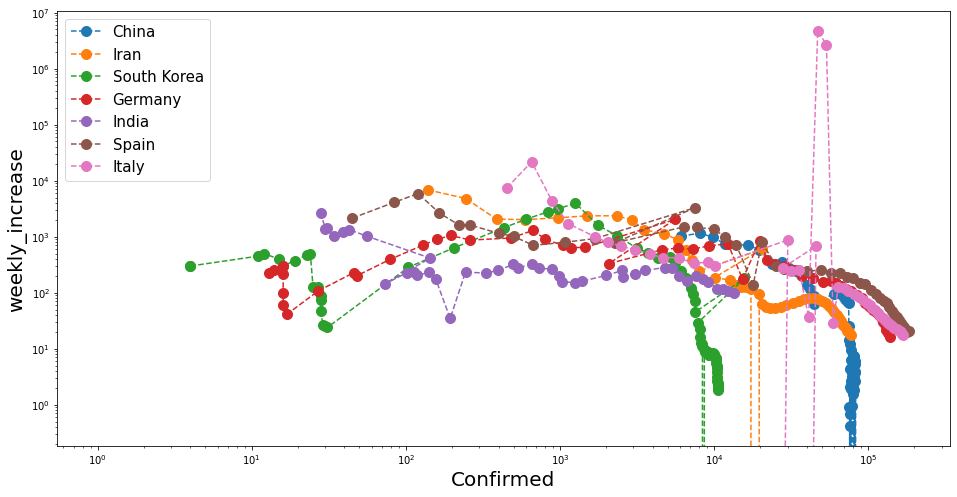

In [33]:
dff = pd.DataFrame(columns=['Country', "Doubling_time"])
Column = "weekly_increase"
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
ax1.set_ylabel(Column,fontsize=20)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('Number of days starting from onset of cases',fontsize=20)

for Country in tqdm(Countries):
  dff2 = prediction_country3(Country, df1,plot=False)
  dff2.plot("Confirmed", "weekly_increase", ls='--', marker='o', ax=ax1, ms=10,label=Country)

  dff = pd.merge(dff,dff2, how='outer')
ax1.legend(fontsize=15)

### And now view the data on world map

In [34]:
world_path = gpd.datasets.get_path('naturalearth_lowres')
World = gpd.read_file(world_path)
World.columns = ['pop_est', 'continent', 'Country', 'iso_a3', 'gdp_md_est', 'geometry']
print(len(World['Country']))
World = pd.merge(World, df_summary, on='Country',how='left')
World["Total_per_pop"] = World['Total_Confirmed_Today']/World['pop_est']*100
World.fillna(0,inplace=True)

177


Text(0.5, 1.0, 'Total number of Covid confirmed per population as on 04-16-2020')

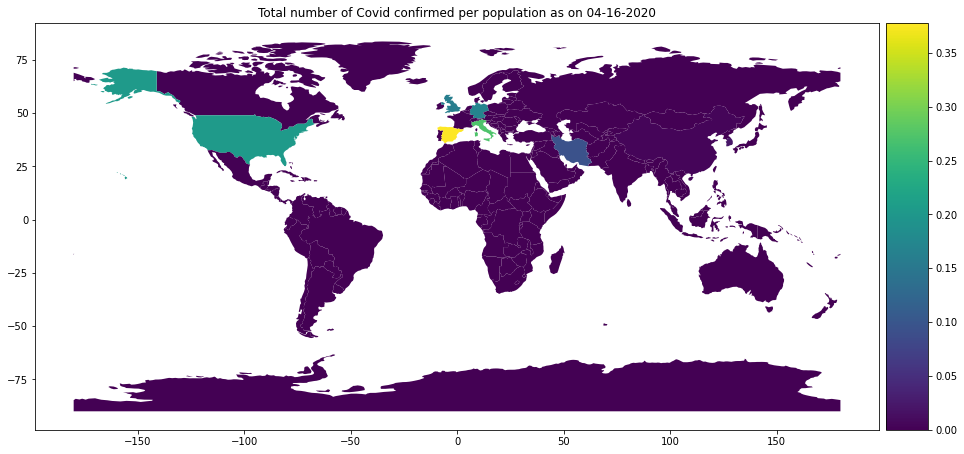

In [35]:
title = "Total_per_pop"
description = "Covid 19 cases world wide"
from mpl_toolkits.axes_grid1 import make_axes_locatable
#World = World[(World.Total_Confirmed_Today>10) & (World.Doubling_time_in_days < 30) & (World.Doubling_time_in_days > 0)]
fig, ax = plt.subplots(1, 1, figsize=(16,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
World.plot(column =title, ax=ax,
            legend=True, cax=cax)
ax.set_title("Total number of Covid confirmed per population as on "+dates[-1])

Text(0.5, 1.0, 'Total number of Covid confirmed as on 04-16-2020')

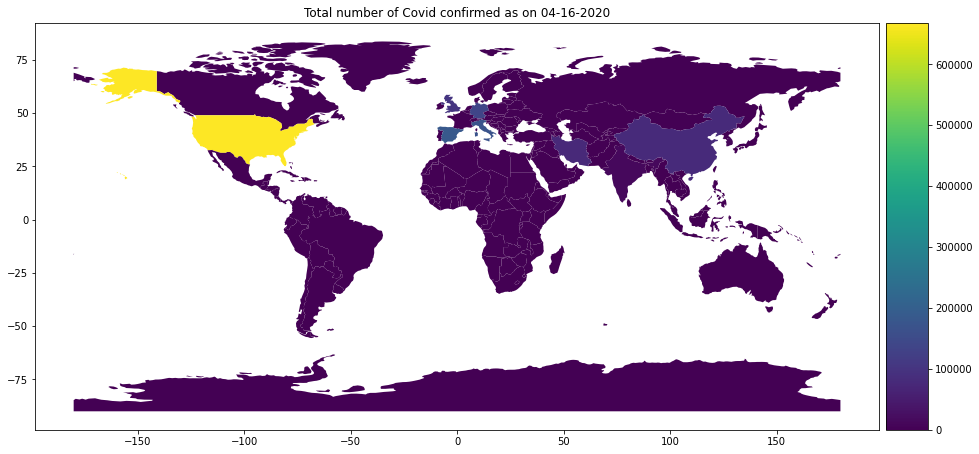

In [36]:
title = "Total_Confirmed_Today"
description = "Covid 19 cases world wide"
from mpl_toolkits.axes_grid1 import make_axes_locatable
#World = World[(World.Total_Confirmed_Today>10) & (World.Doubling_time_in_days < 30) & (World.Doubling_time_in_days > 0)]
fig, ax = plt.subplots(1, 1, figsize=(16,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
World.plot(column =title, ax=ax,
            legend=True, cax=cax)
ax.set_title("Total number of Covid confirmed as on "+dates[-1])

Text(0.5, 1.0, 'Deceased Percentage as on 04-16-2020')

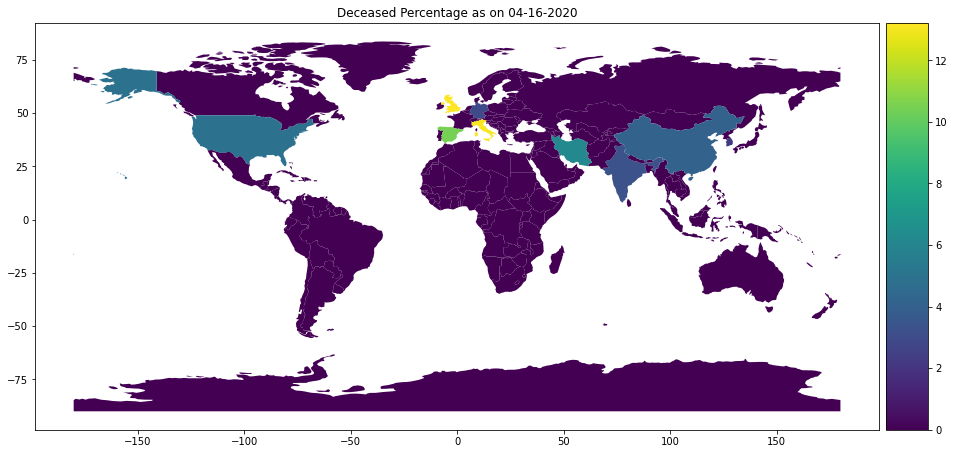

In [37]:
title = "Deceased_Percent"
description = "Covid 19 cases world wide"
from mpl_toolkits.axes_grid1 import make_axes_locatable
#World = World[(World.Total_Confirmed_Today>10) & (World.Doubling_time_in_days < 30) & (World.Doubling_time_in_days > 0)]
fig, ax = plt.subplots(1, 1, figsize=(16,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
World.plot(column =title, ax=ax,
            legend=True, cax=cax)
ax.set_title("Deceased Percentage as on "+dates[-1])

Text(0.5, 1.0, 'Recovered Percentage as on 04-16-2020')

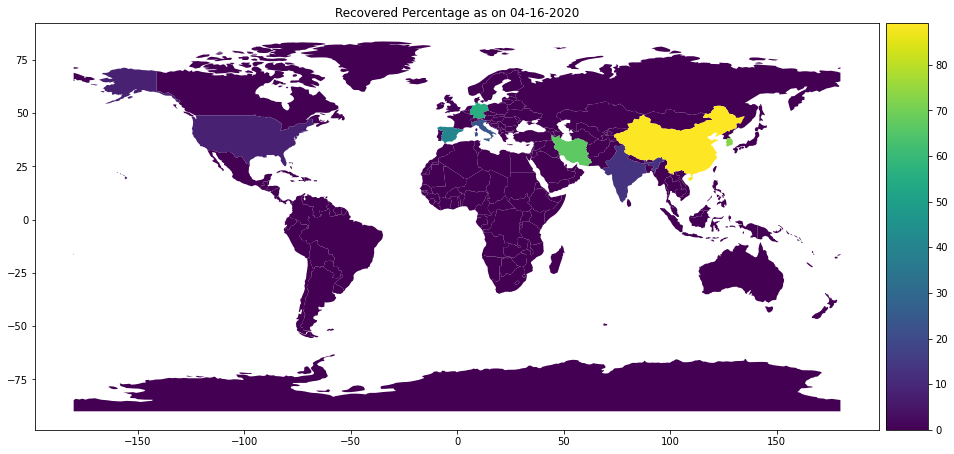

In [38]:
title = "Recovered_Percent"
description = "Covid 19 cases world wide"
from mpl_toolkits.axes_grid1 import make_axes_locatable
#World = World[(World.Total_Confirmed_Today>10) & (World.Doubling_time_in_days < 30) & (World.Doubling_time_in_days > 0)]
fig, ax = plt.subplots(1, 1, figsize=(16,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
World.plot(column =title, ax=ax,
            legend=True, cax=cax)
ax.set_title("Recovered Percentage as on "+dates[-1])

## Let us play around now a little with with different countries

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


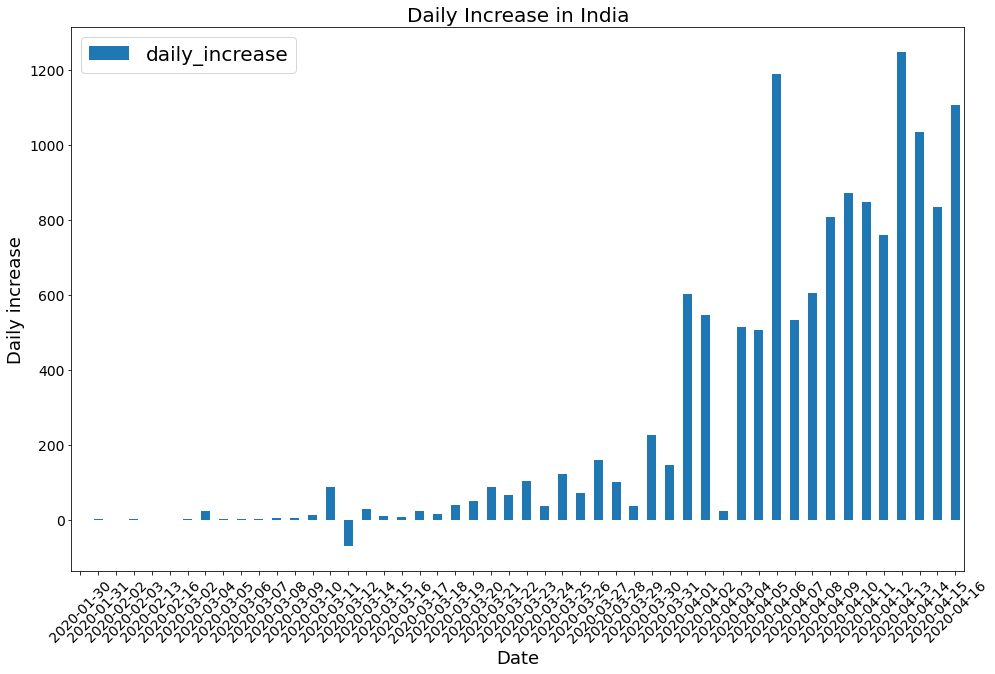

In [39]:
plot_total(df1,"India",'daily_increase')

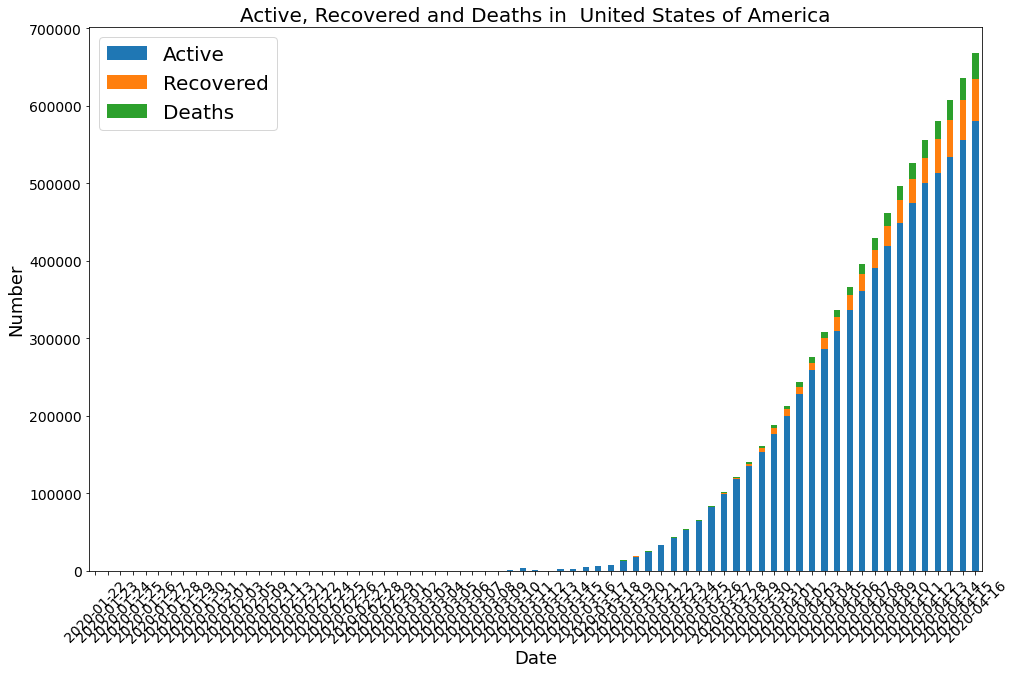

In [40]:
 plot_total(df1,"United States of America",bar=True)

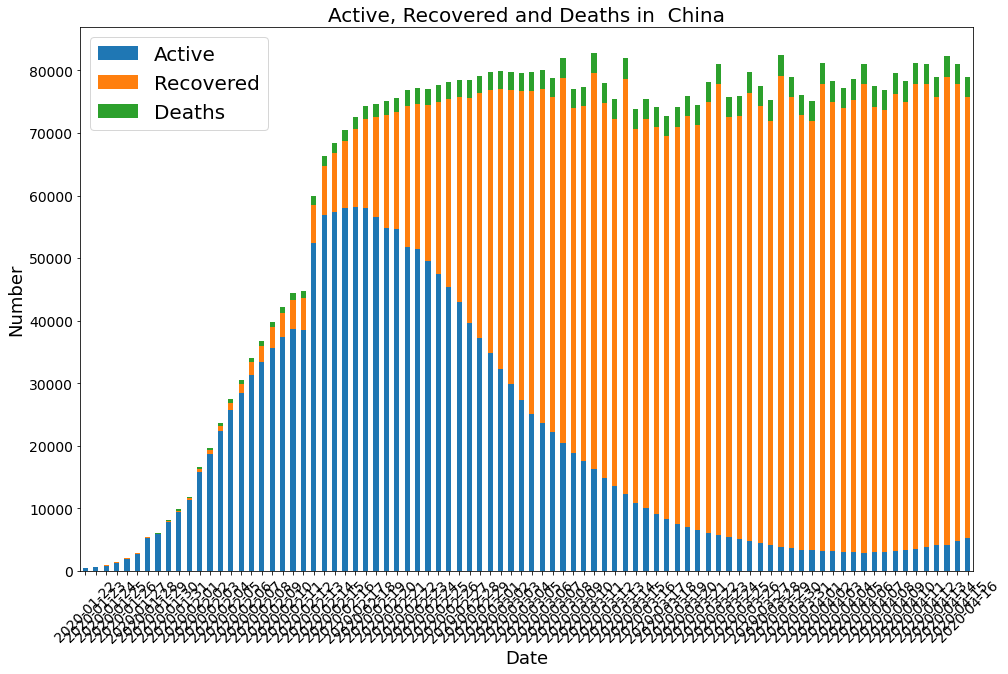

In [41]:
plot_total(df1,"China",bar=True)

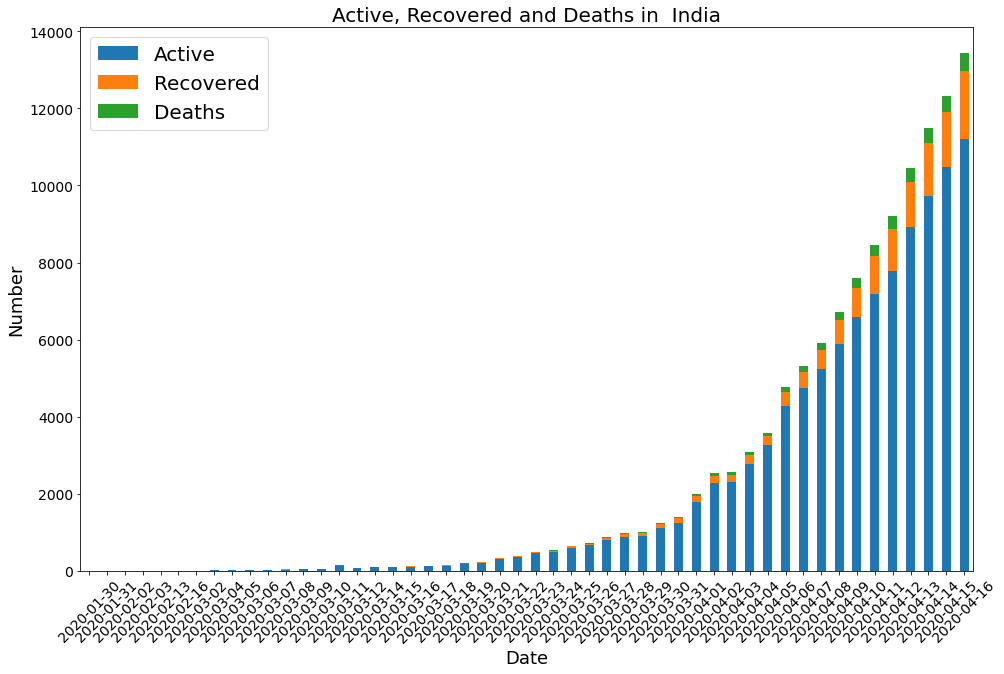

In [42]:
plot_total(df1,'India',bar=True)

## Finally SIR modelling

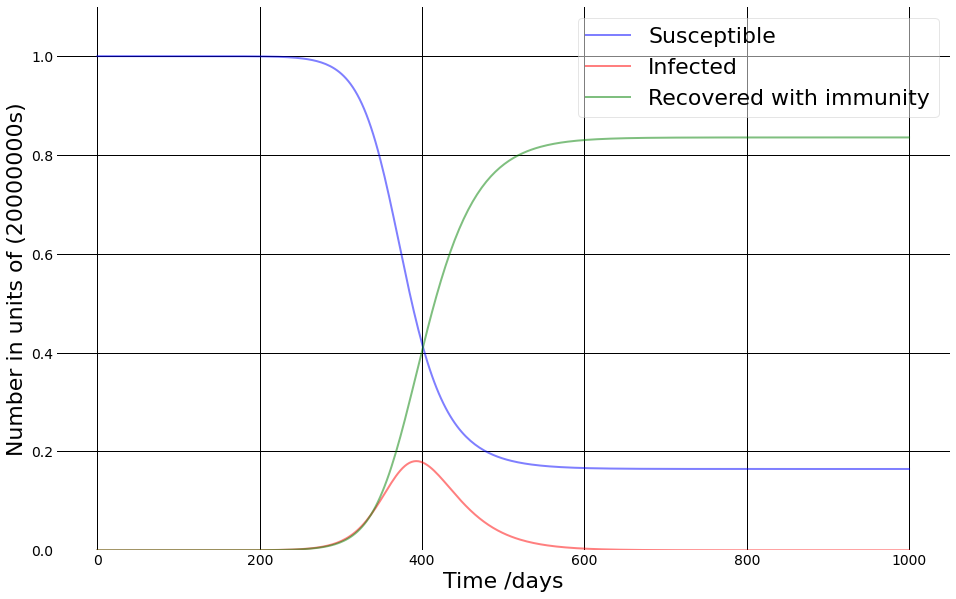

In [43]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 20000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.08, 1/27    #  https://www.worldometers.info/coronavirus/coronavirus-incubation-period/#24
# A grid of time points (in days)
t = np.linspace(0, 1000, 360)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number in units of ('+str(N)+'s)')
ax.set_ylim(0,1.1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='both',axis='both', c='black', lw=1, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

 # adapted code from:  https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

 # Reference: https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-contact-number

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


max hosp 0.003093097148456626


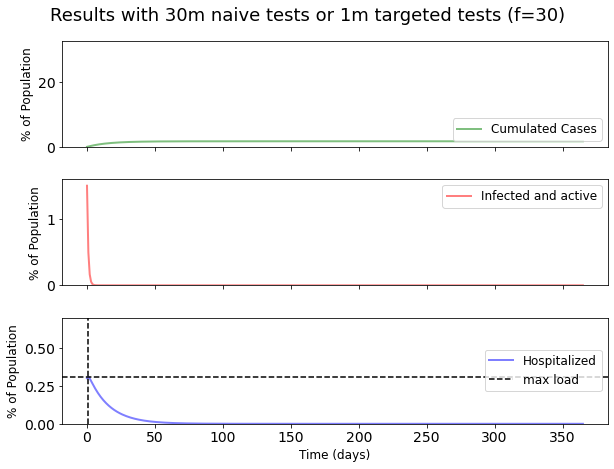

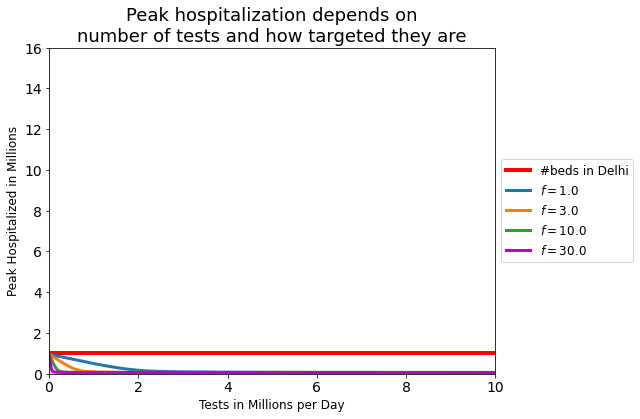

In [44]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
# Total population, N.
N = 20e6
# Initial number of infected and recovered individuals, I0 and R0.
I0, Q0, R0 = 300000, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 - Q0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 1./6, 1./15 
# A grid of time points (in days)
t = np.linspace(0, 365, 365)
# The SIR model differential equations.
Ntest = 1e6
f = 30.0
posrate=0.8
hosprate = 0.20
def deriv(y, t, N, beta, gamma):
    S, I, Q, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - Ntest* f*posrate* I/N - gamma * I
    dQdt = Ntest* f*posrate* I/N - gamma * Q
    dRdt = gamma * (I+Q)
    return dSdt, dIdt, dQdt, dRdt
# Initial conditions vector
y0 = S0, I0, Q0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, Q, R = ret.T
print('max hosp {}'.format(np.max(hosprate*(I+Q)/N)))
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig, axarr = plt.subplots(3, 1, sharex=True, figsize=(9,7)) #facecolor='w')
fs = 12
# plot total cases
axarr[0].plot(t, R/N*100, 'g', alpha=0.5, lw=2, label='Cumulated Cases')
axarr[1].set_ylabel('% of Population', fontsize=fs)
axarr[0].set_ylim(0,33)
legend = axarr[0].legend(loc=4, fontsize=fs)
# plot infected
axarr[1].plot(t, I/N*100, 'r', alpha=0.5, lw=2, label='Infected and active')
#axarr[1].plot(t, Q/N*100, 'm', alpha=0.5, lw=2, label='Infected and quarantined')
axarr[0].set_ylabel('% of Population', fontsize=fs)
axarr[1].set_ylim(0,1.6)
axarr[1].legend(loc=1, fontsize=fs)
# hospitalized
axarr[2].plot(t, hosprate*(I+Q)/N*100, 'b', linestyle='-', alpha=0.5, lw=2, label='Hospitalized')
axarr[2].set_xlabel('Time (days)', fontsize=fs)
axarr[2].set_ylabel('% of Population', fontsize=fs)
axarr[2].legend(loc=1, fontsize=fs)
axarr[2].set_ylim(0,.7)
axarr[2].axvline(np.argmax(hosprate*(I+Q)/N*100), linestyle='--', color='k')
axarr[2].axhline(np.max(hosprate*(I+Q)/N*100), linestyle='--', color='k', label = 'max load')
axarr[2].legend(loc='center right', fontsize=fs)
fig.suptitle('Results with 30m naive tests or 1m targeted tests (f=30)', fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()
def maxhosp(Ntest, f=1.0):
    # Total population, N.
    N = 20e6
    # Initial number of infected and recovered individuals, I0 and R0.
    I0, Q0, R0 = 300000, 0, 0
    # Everyone else, S0, is susceptible to infection initially.
    S0 = N - I0 - R0 - Q0
    # Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
    beta, gamma = 1./6.0, 1.0/15.0 
    # A grid of time points (in days)
    t = np.linspace(0, 365, 365)
    # The SIR model differential equations.
    posrate=0.8
    hosprate = 0.20
    def deriv(y, t, N, beta, gamma):
        S, I, Q, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - Ntest* f*posrate* I/N - gamma * I
        dQdt = Ntest* f*posrate* I/N - gamma * Q
        dRdt = gamma * (I+Q)
        return dSdt, dIdt, dQdt, dRdt
    # Initial conditions vector
    y0 = S0, I0, Q0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, Q, R = ret.T
    return np.max(hosprate*(I+Q)/N)
ntests = np.logspace(3, np.log10(20e6), 300)
sims1 = [maxhosp(n, f=1.0) for n in ntests]
sims3 = [maxhosp(n, f=3.0) for n in ntests]
sims10 = [maxhosp(n, f=10.0) for n in ntests]
sims30 = [maxhosp(n, f=30.0) for n in ntests]
# plot in frac of population
fig, ax = plt.subplots(figsize=(8,6))
ax.axhline(1, color='r', lw=4, linestyle='-', label='#beds in Delhi')
ax.plot(ntests/1e6, np.array(sims1)*N/1e6, lw=3, label='$f=1.0$')
ax.plot(ntests/1e6, np.array(sims3)*N/1e6, lw=3, label='$f=3.0$')
ax.plot(ntests/1e6, np.array(sims10)*N/1e6, lw=3, label='$f=10.0$')
ax.plot(ntests/1e6, np.array(sims30)*N/1e6, lw=3, label='$f=30.0$', color='m')
ax.set_ylabel('Peak Hospitalized in Millions', fontsize=fs)
ax.set_xlabel('Tests in Millions per Day', fontsize=fs)
ax.set_title('Peak hospitalization depends on\nnumber of tests and how targeted they are', fontsize=18)
ax.legend(fontsize=fs, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim((0,10))
ax.set_ylim((0,16))
plt.show()

## Additional Data
Total number of tests done per country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

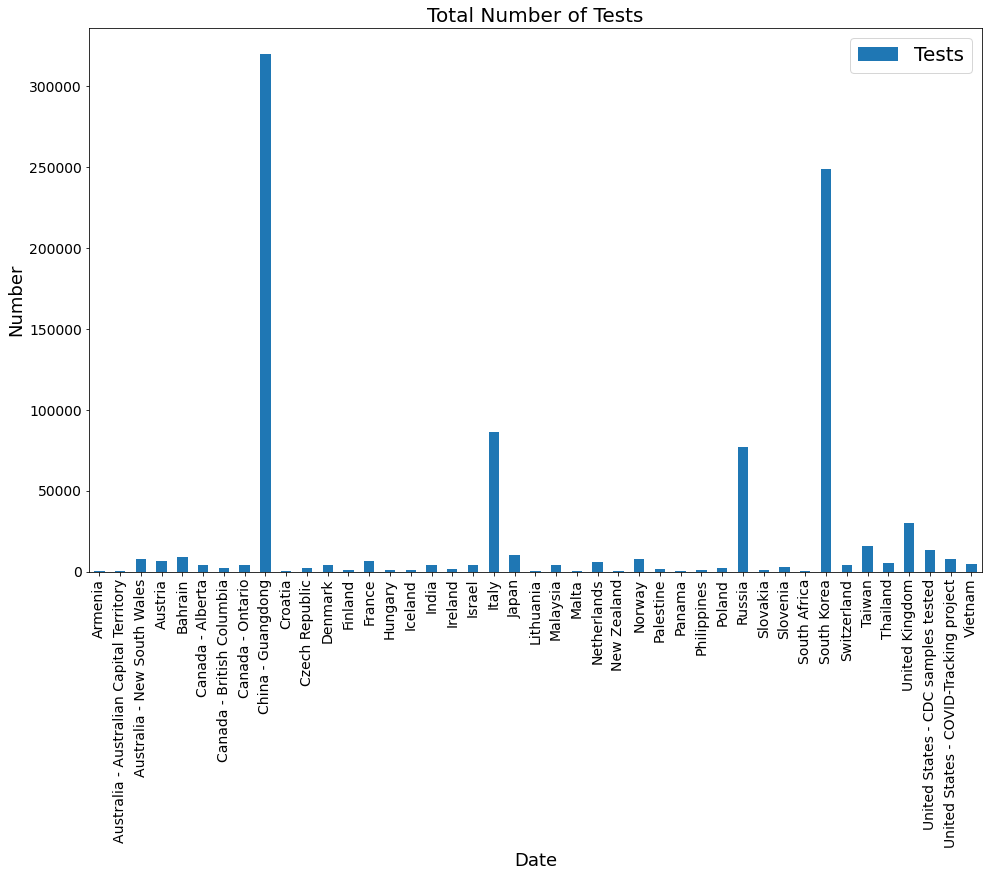

In [45]:
url_number_of_tests = 'https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/COVID-19%20Tests/COVID-19%20Tests.csv'
tests_df = pd.read_csv(url_number_of_tests )
tests_df.columns = ['Country','Year','Tests']
tests_df.set_index("Country", inplace = True)
tests_df.drop('Year', axis = 1, inplace = True)
ax = tests_df.plot.bar()
#ax = tests_df.plot.scatter(x='Country', y='Tests', s=tests_df['Tests'] * 200);
ax.set_ylabel("Number", fontname="Arial", fontsize=18)
ax.set_xlabel("Date", fontname="Arial", fontsize=18)
ax.legend(loc=0, prop={'size': 20})
ax.set_title("Total Number of Tests", fontsize=20)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

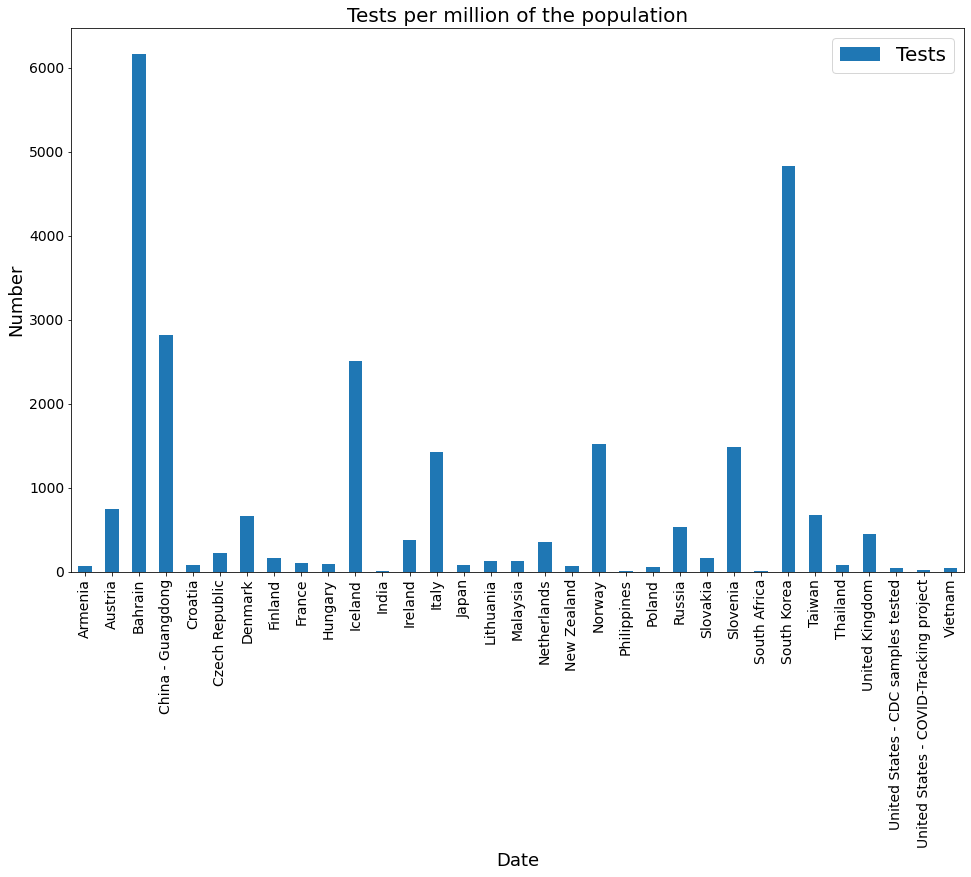

In [46]:
url_number_of_tests = 'https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/COVID-19%20Tests%20per%20million%20people/COVID-19%20Tests%20per%20million%20people.csv'
tests_df = pd.read_csv(url_number_of_tests )
tests_df.columns = ['Country','Year','Tests']
tests_df.set_index("Country", inplace = True)
tests_df.drop('Year', axis = 1, inplace = True)
ax = tests_df.plot.bar()
#ax = tests_df.plot.scatter(x='Country', y='Tests', s=tests_df['Tests'] * 200);
ax.set_ylabel("Number", fontname="Arial", fontsize=18)
ax.set_xlabel("Date", fontname="Arial", fontsize=18)
ax.legend(loc=0, prop={'size': 20})
ax.set_title("Tests per million of the population", fontsize=20)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

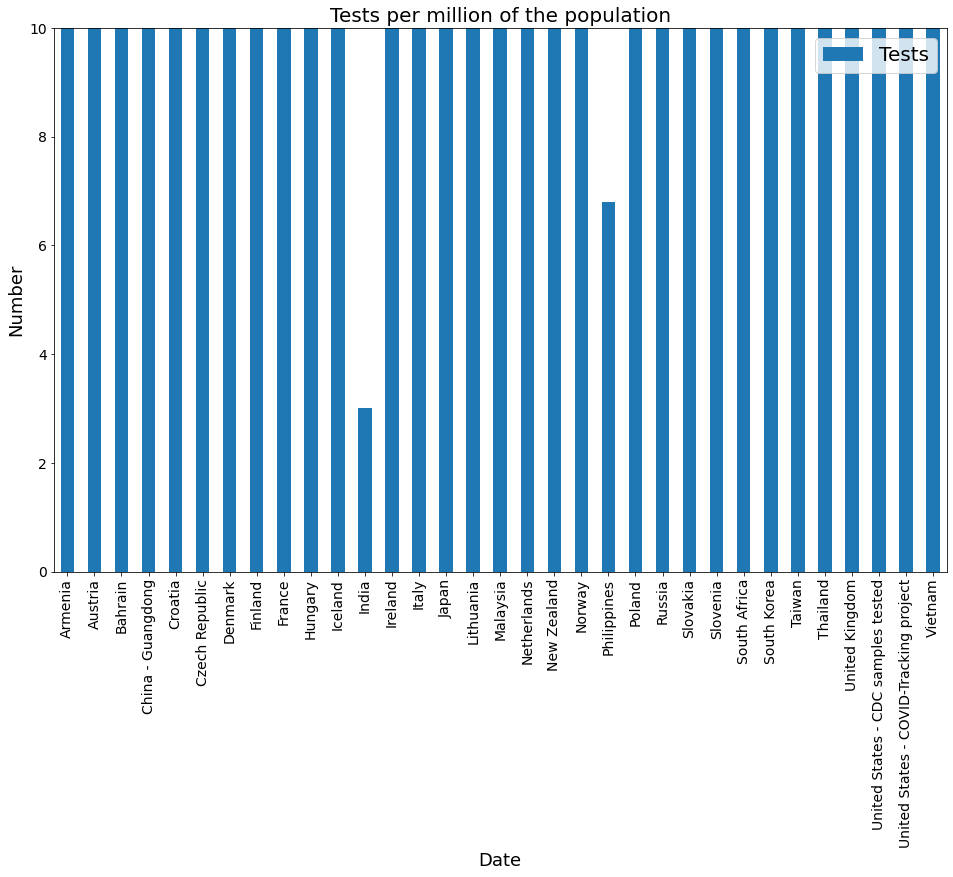

In [47]:
ax = tests_df.plot.bar()
#ax = tests_df.plot.scatter(x='Country', y='Tests', s=tests_df['Tests'] * 200);
ax.set_ylabel("Number", fontname="Arial", fontsize=18)
ax.set_xlabel("Date", fontname="Arial", fontsize=18)
ax.legend(loc=0, prop={'size': 20})
ax.set_ylim(0,10)
ax.set_title("Tests per million of the population", fontsize=20)
plt.xticks(rotation=90)